In [1]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton_disease/Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Cotton_disease/Cotton Disease/test'

# Importing VGG 16 Library

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton_disease/Cotton Disease/train/*')

In [8]:
folders

['/content/drive/MyDrive/Cotton_disease/Cotton Disease/train/diseased cotton plant',
 '/content/drive/MyDrive/Cotton_disease/Cotton Disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/Cotton_disease/Cotton Disease/train/fresh cotton leaf',
 '/content/drive/MyDrive/Cotton_disease/Cotton Disease/train/fresh cotton plant']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
len(folders)

4

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_disease/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_disease/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
122/122 [==============================] - 626s 5s/step - loss: 0.6921 - accuracy: 0.7346 - val_loss: 0.1910 - val_accuracy: 0.9245
Epoch 2/20
122/122 [==============================] - 37s 306ms/step - loss: 0.2482 - accuracy: 0.9039 - val_loss: 0.2329 - val_accuracy: 0.9245
Epoch 3/20
122/122 [==============================] - 37s 307ms/step - loss: 0.2232 - accuracy: 0.9230 - val_loss: 0.1140 - val_accuracy: 0.9623
Epoch 4/20
122/122 [==============================] - 38s 308ms/step - loss: 0.1419 - accuracy: 0.9501 - val_loss: 0.1792 - val_accuracy: 0.9434
Epoch 5/20
122/122 [==============================] - 37s 306ms/step - loss: 0.1118 - accuracy: 0.9669 - val_loss: 0.1146 - val_accuracy: 0.9528
Epoch 6/20
122/122 [==============================] - 38s 309ms/step - loss: 0.0891 - accuracy: 0.9597 - val_loss: 0.1625 - val_accuracy: 0.9528
Epoch 7/20
122/122 [==============================] - 38s 309ms/step - loss: 0.0821 - accuracy: 0.9673 - val_loss: 0.0780 - val_accu

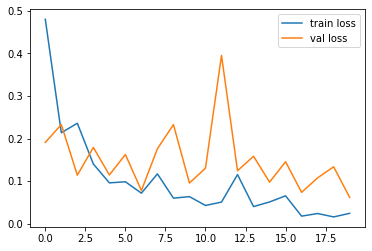

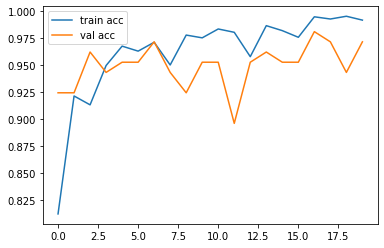

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
model.metrics_names

['loss', 'accuracy']

In [36]:
import warnings
warnings.filterwarnings("ignore")
model.evaluate_generator(test_set)

[0.06188366189599037, 0.9716981053352356]

In [24]:
from tensorflow.keras.preprocessing import image

In [25]:
pred_probabilities = model.predict_generator(test_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [26]:
pred_probabilities

array([[9.9999952e-01, 3.1054981e-08, 1.0854262e-09, 5.2452737e-07],
       [6.1473751e-09, 3.1343085e-04, 7.8191043e-10, 9.9968660e-01],
       [2.5266567e-11, 2.0952315e-07, 7.0854744e-09, 9.9999976e-01],
       [2.6999970e-07, 8.9432669e-01, 2.9986504e-15, 1.0567300e-01],
       [7.7994581e-04, 2.8627295e-02, 1.4039802e-02, 9.5655298e-01],
       [8.8117503e-02, 8.4193150e-04, 8.6605877e-01, 4.4981856e-02],
       [3.2436321e-03, 9.5106906e-01, 1.0786694e-05, 4.5676615e-02],
       [8.2598715e-05, 7.4563825e-01, 4.6366253e-07, 2.5427863e-01],
       [1.8781295e-10, 1.0000000e+00, 2.5147011e-14, 1.7167968e-08],
       [1.0000000e+00, 3.9505236e-11, 1.3183610e-09, 1.4469527e-10],
       [2.9812688e-07, 3.2279464e-11, 9.9999964e-01, 4.0757536e-15],
       [7.3903422e-10, 9.9999988e-01, 2.9033012e-09, 1.5919024e-07],
       [5.2802898e-06, 4.6303682e-03, 3.7748876e-08, 9.9536431e-01],
       [1.7910347e-08, 1.5686956e-04, 1.1299864e-05, 9.9983180e-01],
       [9.2734007e-07, 5.5491161e-

In [29]:
(test_set.classes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [30]:
predictions = pred_probabilities > 0.5

In [31]:
# Numpy can treat this as True/False for us
predictions

array([[ True, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False,  True, False, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False,  True, False, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False, False,  True],
       [False,  True, False, False],
       [False, False, False,  True],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
 

# Transfer learning using Inception architecture

In [40]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [41]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [42]:
x = Flatten()(inception.output)

In [43]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [44]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 111, 111, 32) 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 111, 111, 32) 0           batch_normalization_8[0][0]      
____________________________________________________________________________________________

In [45]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [46]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
122/122 [==============================] - 43s 319ms/step - loss: 3.5273 - accuracy: 0.6617 - val_loss: 0.4740 - val_accuracy: 0.9340
Epoch 2/10
122/122 [==============================] - 37s 302ms/step - loss: 0.8411 - accuracy: 0.8911 - val_loss: 0.7272 - val_accuracy: 0.8962
Epoch 3/10
122/122 [==============================] - 37s 299ms/step - loss: 1.1675 - accuracy: 0.8868 - val_loss: 0.7974 - val_accuracy: 0.9528
Epoch 4/10
122/122 [==============================] - 38s 308ms/step - loss: 0.7480 - accuracy: 0.9129 - val_loss: 1.3372 - val_accuracy: 0.8396
Epoch 5/10
122/122 [==============================] - 38s 311ms/step - loss: 1.2385 - accuracy: 0.9045 - val_loss: 1.0642 - val_accuracy: 0.9340
Epoch 6/10
122/122 [==============================] - 38s 308ms/step - loss: 0.7378 - accuracy: 0.9319 - val_loss: 0.5020 - val_accuracy: 0.9717
Epoch 7/10
122/122 [==============================] - 38s 313ms/step - loss: 0.5345 - accuracy: 0.9470 - val_loss: 0.8296 - val_ac

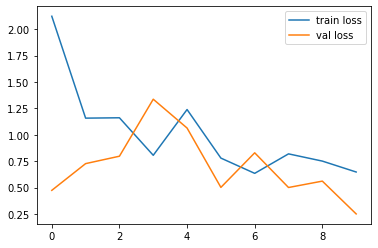

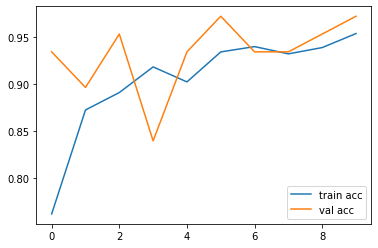

<Figure size 432x288 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [48]:
model.evaluate_generator(test_set)

[0.25081244111061096, 0.9716981053352356]

In [49]:
# Lets test one image from test data
my_image = '/content/drive/MyDrive/Cotton_disease/Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg'


In [51]:
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [53]:
my_image1 = image.load_img(my_image,target_size=IMAGE_SIZE)

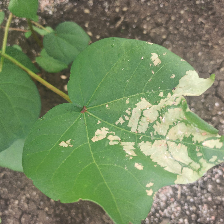

In [54]:
my_image1 # For this image we actually now the class that is diseased cotton leaf.Lets check if the model predicts correctly

In [57]:
type(my_image1)

PIL.Image.Image

In [58]:
my_image1 = image.img_to_array(my_image1)

In [59]:
type(my_image1)

numpy.ndarray

In [60]:
my_image1.shape

(224, 224, 3)

In [61]:
my_image1 = np.expand_dims(my_image1, axis=0)

In [62]:
my_image1.shape

(1, 224, 224, 3)

In [63]:
model.predict(my_image1)

array([[1., 0., 0., 0.]], dtype=float32)

In [64]:
training_set.class_indices 

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

It can be seen that its predicted as 0 class and from class indices we can see 0 class is diseased cotton leaf (which we knew before) 


# Transfer Learning using Resnet 50

In [65]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [66]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [67]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [68]:
x = Flatten()(resnet.output)

In [69]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [70]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [80]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [73]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
122/122 [==============================] - 38s 311ms/step - loss: 1.0344 - accuracy: 0.6140 - val_loss: 1.1525 - val_accuracy: 0.5566
Epoch 2/10
122/122 [==============================] - 38s 309ms/step - loss: 1.2929 - accuracy: 0.6181 - val_loss: 1.8787 - val_accuracy: 0.5755
Epoch 3/10
122/122 [==============================] - 38s 313ms/step - loss: 1.0151 - accuracy: 0.6433 - val_loss: 1.1720 - val_accuracy: 0.6604
Epoch 4/10
122/122 [==============================] - 38s 310ms/step - loss: 1.0055 - accuracy: 0.6607 - val_loss: 1.5403 - val_accuracy: 0.5472
Epoch 5/10
122/122 [==============================] - 37s 305ms/step - loss: 0.9093 - accuracy: 0.6894 - val_loss: 0.6658 - val_accuracy: 0.7358
Epoch 6/10
122/122 [==============================] - 37s 305ms/step - loss: 0.9429 - accuracy: 0.6797 - val_loss: 2.6703 - val_accuracy: 0.5189
Epoch 7/10
122/122 [==============================] - 37s 307ms/step - loss: 1.0301 - accuracy: 0.6699 - val_loss: 1.2247 - val_ac

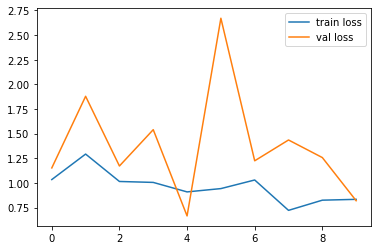

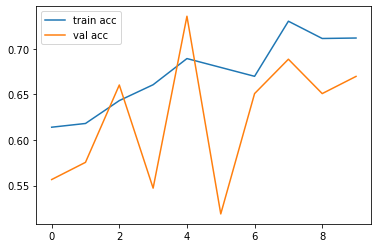

<Figure size 432x288 with 0 Axes>

In [74]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [75]:
model.evaluate_generator(test_set)

[0.8199297785758972, 0.6698113083839417]

# Transfer Learning Alexnet using VGG 19



In [83]:
from tensorflow.keras.applications.vgg19 import VGG19

In [84]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [91]:
for layer in vgg19.layers:
    layer.trainable = False

In [92]:
x = Flatten()(vgg19.output)

In [93]:
prediction = Dense(len(folders), activation='softmax')(x)

In [94]:
model = Model(inputs=vgg19.input, outputs=prediction)

In [95]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [96]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [97]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
122/122 [==============================] - 39s 315ms/step - loss: 1.2515 - accuracy: 0.5920 - val_loss: 0.2797 - val_accuracy: 0.9057
Epoch 2/10
122/122 [==============================] - 38s 311ms/step - loss: 0.2846 - accuracy: 0.8888 - val_loss: 0.2132 - val_accuracy: 0.9245
Epoch 3/10
122/122 [==============================] - 38s 309ms/step - loss: 0.2051 - accuracy: 0.9225 - val_loss: 0.2126 - val_accuracy: 0.8868
Epoch 4/10
122/122 [==============================] - 38s 309ms/step - loss: 0.2487 - accuracy: 0.9042 - val_loss: 0.1585 - val_accuracy: 0.9623
Epoch 5/10
122/122 [==============================] - 38s 312ms/step - loss: 0.1651 - accuracy: 0.9380 - val_loss: 0.2643 - val_accuracy: 0.8679
Epoch 6/10
122/122 [==============================] - 38s 308ms/step - loss: 0.1470 - accuracy: 0.9481 - val_loss: 0.1304 - val_accuracy: 0.9434
Epoch 7/10
122/122 [==============================] - 38s 308ms/step - loss: 0.1363 - accuracy: 0.9502 - val_loss: 0.2014 - val_ac

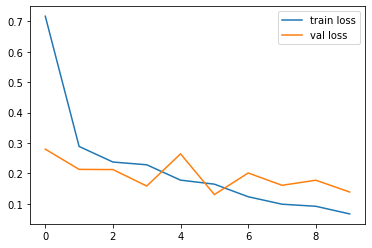

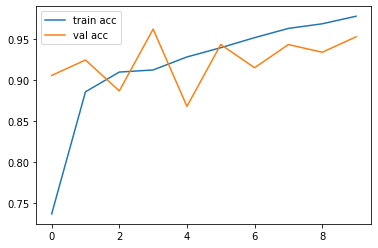

<Figure size 432x288 with 0 Axes>

In [98]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [99]:
model.evaluate_generator(test_set)

[0.13876740634441376, 0.9528301954269409]